In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import sys
sys.path.append('/home3/sreich/MITgcm_c68w/MITgcm/utils/python/MITgcmutils')

from MITgcmutils import rdmds, llc


sys.path.append('/home3/sreich/jupyter/jupyter_notebooks')
from patchface3D import *
from read_write import *

# Sensitivities

In [3]:
nx = 90
ny = nx*13
nz = 50

#run_dir='/nobackup/sreich/llc270_c68w_runs/run_sens_pk0000841536_ke_42days/'
#run_dir='/nobackup/sreich/multigrid_test_ou/c68w/llc90/run.v4_rls4.077d3.simple.iter1/'
run_dir='/nobackup/sreich/multigrid_jpl_obsfit/llc90/run.v4_rls4.077d3.iter0.swot1992.adj/'


#adxx_atemp = rdmds(run_dir+'adxx_atemp.0000000001')
adxx_theta = rdmds(run_dir+'adxx_theta.0000000000')
adxx_salt = rdmds(run_dir+'adxx_salt.0000000000')

np.unique(adxx_theta), np.unique(adxx_salt) #nz, ny, nx

(array([0.]), array([0.]))

In [14]:
pup_dir = '/nobackup/sreich/multigrid_test_ou/c68w/llc90/run.v4_rls4.077d3.simple.pack_unpack_iter2/'

xx_atemp = rdmds(pup_dir+'xx_atemp.0000000002')
xx_theta = rdmds(pup_dir+'xx_theta.0000000002')
xx_salt = rdmds(pup_dir+'xx_salt.0000000002')

1
(90, 270, 1)
50
(90, 270, 50)
50
(90, 270, 50)
1
(90, 270, 1)
50
(90, 270, 50)
50
(90, 270, 50)


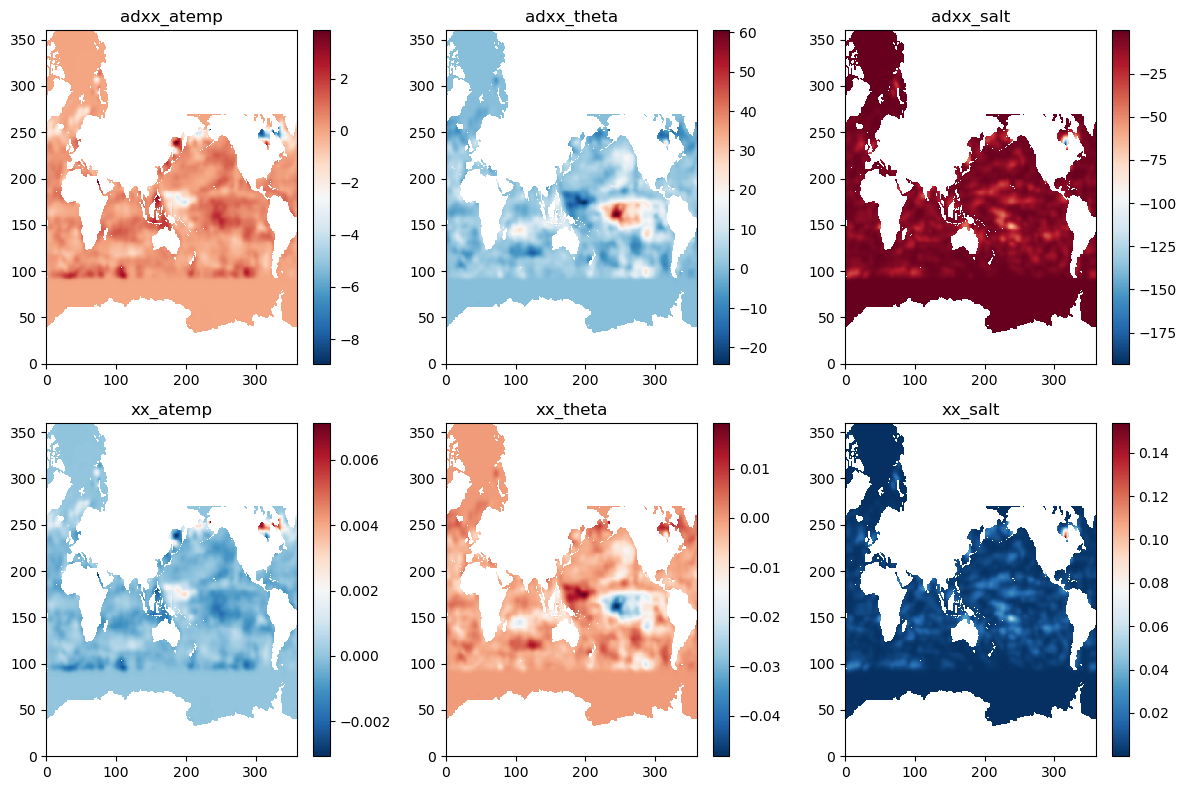

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.ravel()

titles = ['adxx_atemp', 'adxx_theta', 'adxx_salt']#, 'adxx_etan', 'adxx_salt']

# Data arrays
data_arrays = [adxx_atemp, adxx_theta, adxx_salt]#, adxx_etan, adxx_salt]
nnz = [4, nz, nz]

adxx_wrl = patchface3D(adxx_atemp[0,:,:], nx, 1)[0, :, :]
adxx_wrl[adxx_wrl == 0] = np.nan
pcm = axes[0].pcolormesh(adxx_wrl, cmap='RdBu_r')
fig.colorbar(pcm, ax=axes[0])
axes[0].set_title('adxx_atemp')

adxx_wrl = patchface3D(adxx_theta, nx, nz)[0, :, :]
adxx_wrl[adxx_wrl == 0] = np.nan
pcm = axes[1].pcolormesh(adxx_wrl, cmap='RdBu_r')
fig.colorbar(pcm, ax=axes[1])
axes[1].set_title('adxx_theta')

adxx_wrl = patchface3D(adxx_salt, nx, nz)[0, :, :]
adxx_wrl[adxx_wrl == 0] = np.nan
pcm = axes[2].pcolormesh(adxx_wrl, cmap='RdBu_r')
fig.colorbar(pcm, ax=axes[2])
axes[2].set_title('adxx_salt')


xx_wrl = patchface3D(xx_atemp[0,:,:], nx, 1)[0, :, :]
xx_wrl[xx_wrl == 0] = np.nan
pcm = axes[3].pcolormesh(xx_wrl, cmap='RdBu_r')
fig.colorbar(pcm, ax=axes[3])
axes[3].set_title('xx_atemp')

xx_wrl = patchface3D(xx_theta, nx, nz)[0, :, :]
xx_wrl[xx_wrl == 0] = np.nan
pcm = axes[4].pcolormesh(xx_wrl, cmap='RdBu_r')
fig.colorbar(pcm, ax=axes[4])
axes[4].set_title('xx_theta')

xx_wrl = patchface3D(xx_salt, nx, nz)[0, :, :]
xx_wrl[xx_wrl == 0] = np.nan
pcm = axes[5].pcolormesh(xx_wrl, cmap='RdBu_r')
fig.colorbar(pcm, ax=axes[5])
axes[5].set_title('xx_salt')


plt.tight_layout()
plt.show()




In [ ]:


# axes = axes.ravel()  # Flatten the 2D array of axes for easy indexing


# xx_atemp[xx_atemp == 0] = np.nan


# ax = axes[0]
# mesh = ax.pcolormesh(patchface3D(xx_atemp[0,:,:], nx, 1)[0,:,:], cmap='RdBu_r')
# ax.set_title('xx_atemp[0]')
# fig.colorbar(mesh, ax=ax)

# ax = axes[1]
# mesh = ax.pcolormesh(patchface3D(xx_atemp[1,:,:], nx, 1)[0,:,:], cmap='RdBu_r')
# ax.set_title('xx_atemp[1]')
# fig.colorbar(mesh, ax=ax)

# ax = axes[2]
# mesh = ax.pcolormesh(patchface3D(xx_atemp[2,:,:], nx, 1)[0,:,:], cmap='RdBu_r')
# ax.set_title('xx_atemp[2]')
# fig.colorbar(mesh, ax=ax)

# ax = axes[3]
# mesh = ax.pcolormesh(patchface3D(xx_atemp[3,:,:], nx, 1)[0,:,:], cmap='RdBu_r')
# ax.set_title('xx_atemp[3]')
# fig.colorbar(mesh, ax=ax)

# plt.tight_layout()
# plt.show()

# Saltmon

(568620000,)
1
(270, 810, 1)


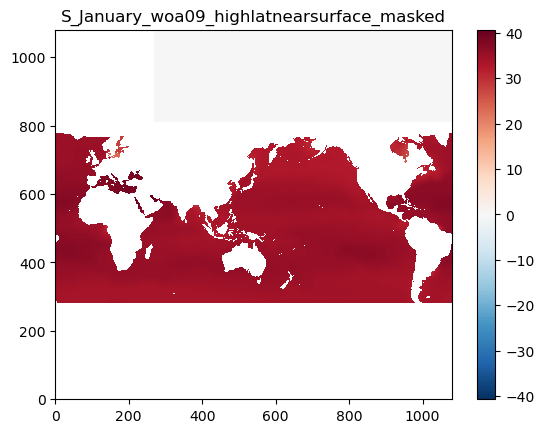

50
(270, 810, 50)


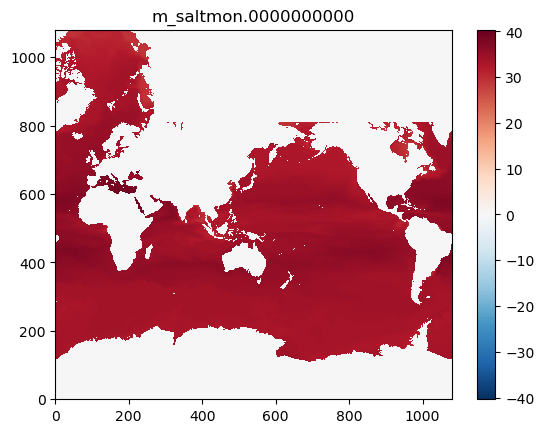

In [34]:
nxh = 270
nyh = 270*13


dirroot = '/nobackup/sreich/multigrid_test_ou/c68w/'


#adxx_salt = rdmds(run_dir+'adxx_salt.0000000001')

data_hr = read_float32(dirroot + 'llc270/run.fwd_270.076c.saltmon.iter0/S_monthly_woa09_highlatnearsurface_masked_llc270').reshape(12, nz, nyh, nxh)[0,:,:,:]
data_hr[data_hr <= 0] = np.nan

vmax = np.nanmax(abs(data_hr))
vmin=-vmax
plt.pcolormesh(patchface3D(data_hr[0,:,:], nxh, 1)[0,:,:], cmap='RdBu_r', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title('S_January_woa09_highlatnearsurface_masked')
plt.show()


salt_hr = rdmds(dirroot + 'llc270/run.fwd_270.076c.saltmon.iter0/m_saltmon.0000000000')

vmax = np.nanmax(abs(salt_hr))
vmin=-vmax
plt.pcolormesh(patchface3D(salt_hr, nxh, 50)[0,:,:], cmap='RdBu_r', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title('m_saltmon.0000000000')
plt.show()



50
(270, 810, 50)


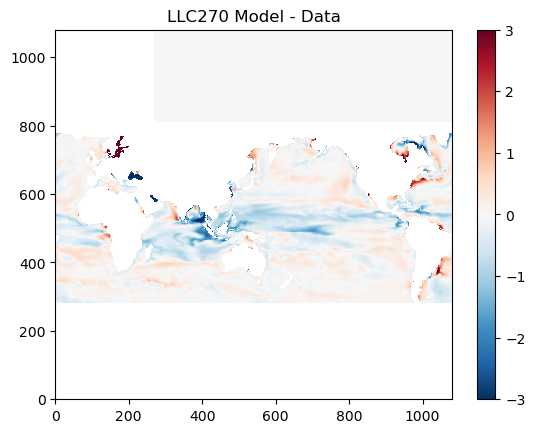

50
(270, 810, 50)


/var/tmp/pbs.20652900.pbspl1.nas.nasa.gov/ipykernel_55100/1504948061.py:20: RuntimeWarning: Mean of empty slice
  lr_misfit_wrl = np.nanmean(reshape_misfit, axis=(2, 4))


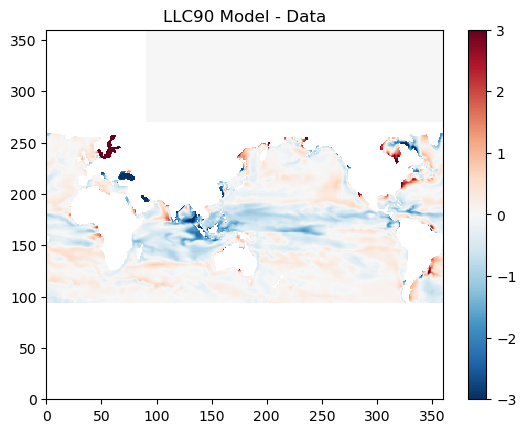

In [67]:
#misfit = patchface3D(salt_hr, nxh, 50) - patchface3D(data_hr, nxh, 50)
misfit = salt_hr - data_hr


vmax = np.nanmax(abs(misfit))
vmin=-vmax
plt.pcolormesh(patchface3D(misfit, nxh, 50)[0,:,:], cmap='RdBu_r', vmin=-3, vmax=3)
plt.colorbar()
plt.title('LLC270 Model - Data')
plt.show()


# Coarsen Misfit
nxlr = 90
nylr = nxlr*13

misfit_wrl = patchface3D(misfit, nxh, nz)

reshape_misfit = misfit_wrl.reshape(nz, nx*4, 3, nx*4, 3)
lr_misfit_wrl = np.nanmean(reshape_misfit, axis=(2, 4))


vmax = np.nanmax(abs(lr_misfit_wrl))
vmin=-vmax
plt.pcolormesh(lr_misfit_wrl[0,:,:], cmap='RdBu_r', vmin=-3, vmax=3)
plt.colorbar()
plt.title('LLC90 Model - Data')
plt.show()

50
(90, 270, 50)


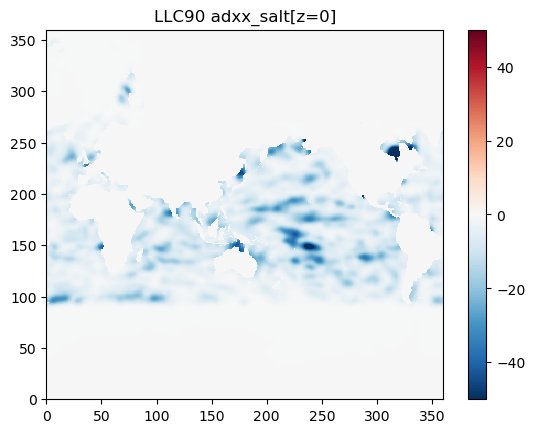

50
(90, 270, 50)


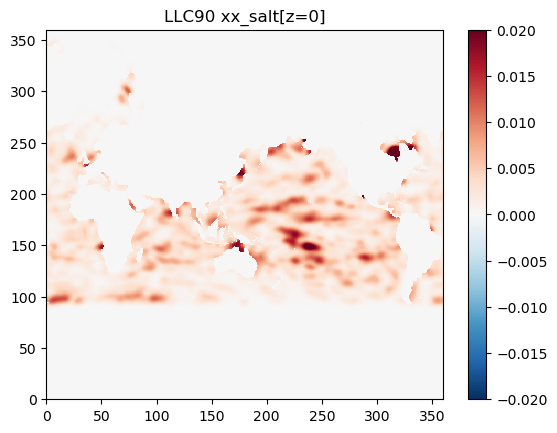

In [77]:
adxx_salt = rdmds(dirroot+'llc90/run.v4_rls4.077d3.saltmon.iter0/adxx_salt.0000000000')

vmax = np.nanmax(abs(adxx_salt))
vmin=-vmax
plt.pcolormesh(patchface3D(adxx_salt, nx, 50)[0,:,:], cmap='RdBu_r', vmin=-50, vmax=50)
plt.colorbar()
plt.title('LLC90 adxx_salt[z=0]')
plt.show()

xx_salt = rdmds(dirroot+'llc90/run.v4_rls4.077d3.saltmon.pack_unpack_iter1/xx_salt.0000000001')

vmax = np.nanmax(abs(xx_salt))
vmin=-vmax
plt.pcolormesh(patchface3D(xx_salt, nx, 50)[0,:,:], cmap='RdBu_r', vmin=-0.02, vmax=0.02)
plt.colorbar()
plt.title('LLC90 xx_salt[z=0]')
plt.show()

# Thetamon

(568620000,)
1
(270, 810, 1)


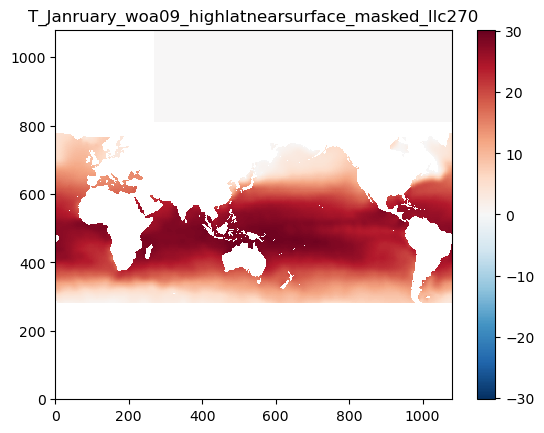

50
(270, 810, 50)


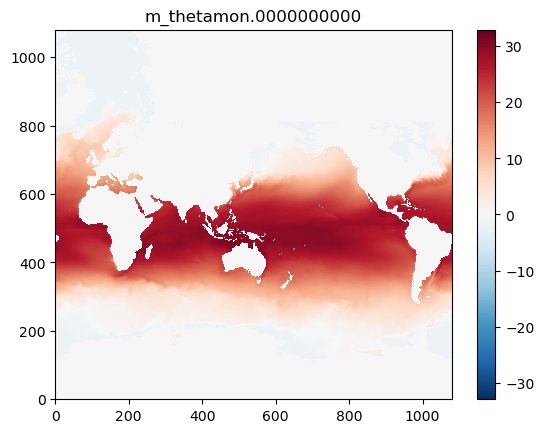

50
(270, 810, 50)


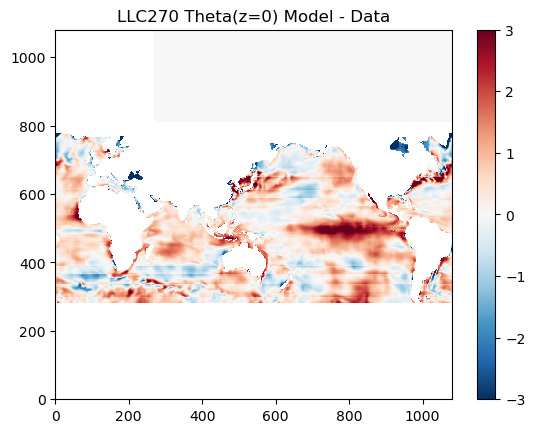

In [81]:
data_hr = read_float32(dirroot + 'llc270/run.fwd_270.076c.saltmon.iter0/T_monthly_woa09_highlatnearsurface_masked_llc270').reshape(12, nz, nyh, nxh)[0,:,:,:]
data_hr[data_hr <= 0] = np.nan

vmax = np.nanmax(abs(data_hr))
vmin=-vmax
plt.pcolormesh(patchface3D(data_hr[0,:,:], nxh, 1)[0,:,:], cmap='RdBu_r', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title('T_Janruary_woa09_highlatnearsurface_masked_llc270')
plt.show()


theta_hr = rdmds(dirroot + 'llc270/run.fwd_270.076c.simple.iter0/m_thetamon.0000000000')

vmax = np.nanmax(abs(theta_hr))
vmin=-vmax
plt.pcolormesh(patchface3D(theta_hr, nxh, 50)[0,:,:], cmap='RdBu_r', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title('m_thetamon.0000000000')
plt.show()

misfit = theta_hr - data_hr

vmax = np.nanmax(abs(misfit))
vmin=-vmax
plt.pcolormesh(patchface3D(misfit, nxh, 50)[0,:,:], cmap='RdBu_r', vmin=-3, vmax=3)
plt.colorbar()
plt.title('LLC270 Theta(z=0) Model - Data')
plt.show()